# Methane Team: Classification of Methane Leak and Nonleak
Team Members: Lin Gan, Ian Chen, Jiang Qu



<h1>Connect to Your Google Drive</h1>

In [2]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


<h1>Import Library</h1>

In [3]:
import os, shutil
from keras import layers 
from keras import models 
from keras import optimizers 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
from keras.preprocessing import image 
from tensorflow.keras import utils
utils.to_categorical
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
from keras.models import load_model

In [4]:

original_dataset_dir = '/content/gdrive/MyDrive/Methane_Team/Leakage_Classification/Hardware_image_testing/DS_20x106'
base_dir = '/content/gdrive/MyDrive/Methane_Team/Leakage_Classification/Hardware_image_testing/TestDS_20x106'

shutil.rmtree(base_dir, ignore_errors=True)
os.mkdir(base_dir) 
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir) 
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir) 
test_dir = os.path.join(base_dir, 'test') 
os.mkdir(test_dir) 

train_leaks_dir = os.path.join(train_dir, 'leaks')
os.mkdir(train_leaks_dir) 

train_nonleaks_dir = os.path.join(train_dir, 'nonleaks') 
os.mkdir(train_nonleaks_dir) 


validation_leaks_dir = os.path.join(validation_dir, 'leaks') 
os.mkdir(validation_leaks_dir) 
validation_nonleaks_dir = os.path.join(validation_dir, 'nonleaks') 
os.mkdir(validation_nonleaks_dir) 

test_leaks_dir = os.path.join(test_dir, 'leaks') 
os.mkdir(test_leaks_dir) 
test_nonleaks_dir = os.path.join(test_dir, 'nonleaks') 
os.mkdir(test_nonleaks_dir) 

In [5]:

fnames = ['newleak{}_20x106.jpg'.format(i) for i in range(19, 1535)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_leaks_dir, fname) 
    # for f in os.listdir(original_dataset_dir):
    #   print(f)  
    shutil.copyfile(src, dst) 

fnames = ['newleak{}_20x106.jpg'.format(i) for i in range(1540, 3018)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_leaks_dir, fname) 
    shutil.copyfile(src, dst) 

fnames = ['newleak{}_20x106.jpg'.format(i) for i in range(3024, 4541)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_leaks_dir, fname) 
    shutil.copyfile(src, dst) 


fnames = ['newnonleak{}_20x106.jpg'.format(i) for i in range(0, 18)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_nonleaks_dir, fname) 
    shutil.copyfile(src, dst) 

fnames = ['newnonleak{}_20x106.jpg'.format(i) for i in range(1536, 1539)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_nonleaks_dir, fname) 
    shutil.copyfile(src, dst) 

fnames = ['newnonleak{}_20x106.jpg'.format(i) for i in range(3019, 3023)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_nonleaks_dir, fname) 
    shutil.copyfile(src, dst) 

In [6]:

model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [7]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:

train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255) 

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary' 
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary'
)

Found 1534 images belonging to 2 classes.
Found 1481 images belonging to 2 classes.


In [9]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=1, 
    epochs=100, 
    validation_data=validation_generator, 
    validation_steps=1
)


model.save('leak_and_nonleak_1.h5')

<ipython-input-9-66ee73033319>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.6960 - acc: 0.1500 - val_loss: 0.5911 - val_acc: 0.9500
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 0.5425 - acc: 1.0000 - val_loss: 0.4570 - val_acc: 1.0000
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 0.4060 - acc: 1.0000 - val_loss: 0.3218 - val_acc: 1.0000
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 0.2686 - acc: 1.0000 - val_loss: 0.2087 - val_acc: 1.0000
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 0.1623 - acc: 1.0000 - val_loss: 0.1268 - val_acc: 1.0000
Epoch 6/100
1/1 [==============================] - 4s 4s/step - loss: 0.0892 - acc: 1.0000 - val_loss: 0.0779 - val_acc: 1.0000
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 0.1908 - acc: 0.9500 - val_loss: 0.0757 - val_acc: 1.0000
Epoch 8/100
1/1 [==============================] - 1s 1s/step - loss: 0.0502 - acc: 1.0000 - val_loss: 0

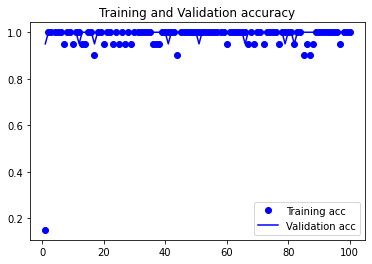

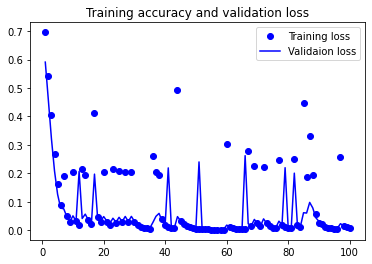

In [10]:


acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs = range(1, len(acc) + 1) 

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and Validation accuracy') 
plt.legend() 

plt.figure() 

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validaion loss') 
plt.title('Training accuracy and validation loss') 
plt.legend() 

plt.show() 

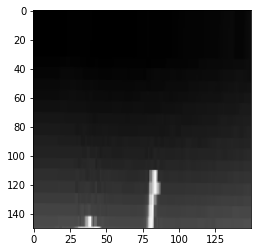

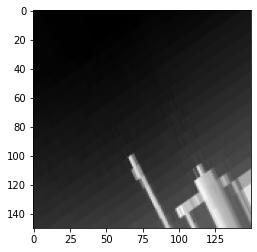

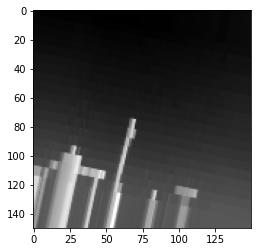

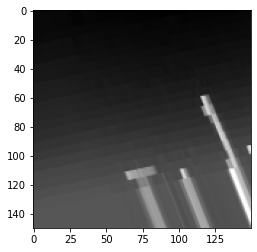

In [11]:
datagen = ImageDataGenerator(
    rotation_range=40,       
    width_shift_range=0.2,    
    height_shift_range=0.2,   
    shear_range=0.2,          
    zoom_range=0.2,           
    horizontal_flip=True,     
    fill_mode='nearest'      
)



fnames = [os.path.join(train_leaks_dir, fname) for fname in os.listdir(train_leaks_dir)]
img_path = fnames[3]  
img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)   
x = x.reshape((1, ) + x.shape)   

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i) 
    i += 1
    imgplot = plt.imshow(array_to_img(batch[0])) 
    if i % 4 == 0:
        break 
plt.show() 

In [12]:
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255) 
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='binary'
)

history = model.fit_generator(  
    
    train_generator, 
    steps_per_epoch=1, 
    epochs=10, 
    validation_data=validation_generator, 
    validation_steps=1
)

# Save
model.save('leak_and_nonleak_2.h5') 

Found 1534 images belonging to 2 classes.
Found 1481 images belonging to 2 classes.


<ipython-input-13-0b03bd429ddd>:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.6682 - acc: 0.8667 - val_loss: 0.5180 - val_acc: 0.9688
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 0.4628 - acc: 1.0000 - val_loss: 0.3103 - val_acc: 1.0000
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 0.2584 - acc: 1.0000 - val_loss: 0.2093 - val_acc: 0.9688
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 0.1602 - acc: 1.0000 - val_loss: 0.0728 - val_acc: 1.0000
Epoch 5/10
1/1 [==============================] - 4s 4s/step - loss: 0.1292 - acc: 0.9688 - val_loss: 0.0420 - val_acc: 1.0000
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 0.0966 - acc: 0.9688 - val_loss: 0.0325 - val_acc: 1.0000
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 0.1940 - acc: 0.9688 - val_loss: 0.0429 - val_acc: 1.0000
Epoch 8/10
1/1 [==============================] - 3s 3s/step - loss: 0.0387 - acc: 1.0000 - val_loss: 0.0255 - 

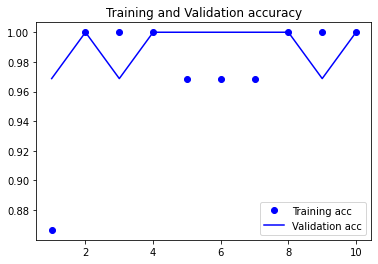

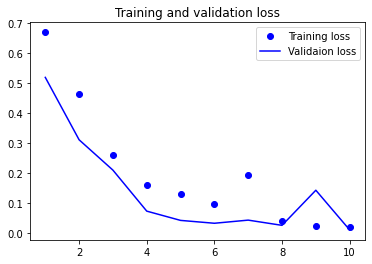

In [14]:


acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs = range(1, len(acc) + 1) 

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and Validation accuracy') 
plt.legend() 

plt.figure() 

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validaion loss') 
plt.title('Training and validation loss') 
plt.legend() 

plt.show() 

In [34]:
#f1 = r'/content/gdrive/MyDrive/Methane_Team/Leakage_Classification/test/frame5013.jpg'  
#f2 = r'/content/gdrive/MyDrive/Methane_Team/Leakage_Classification/test/frame4544.jpg' 
f1 = r'/content/gdrive/MyDrive/Methane_Team/Leakage_Classification/Hardware_image_testing/DS_20x106/newleak3666_20x106.jpg' 
f2 = r'/content/gdrive/MyDrive/Methane_Team/Leakage_Classification/Hardware_image_testing/DS_20x106/newnonleak17_20x106.jpg' 



img_path = f1
img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)   
x = x.astype('float32') / 255
x = x.reshape((1, ) + x.shape)   

res = model.predict(x)   
leak_acc = 1 - res[0][0]
leak_acc

1/1 [==============================] - 0s 37ms/step


0.992678577080369

1/1 [==============================] - 0s 114ms/step


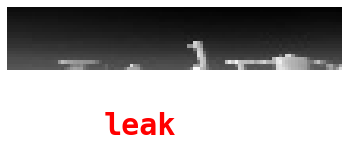

In [35]:


model = load_model('./leak_and_nonleak_2.h5')
image_path = r'/content/gdrive/MyDrive/Methane_Team/Leakage_Classification/Hardware_image_testing/DS_20x106/newnonleak17_20x106.jpg'  
original_image = load_img(image_path)

img = load_img(image_path, target_size=(150, 150))
x = img_to_array(img) 
x = x.astype('float32') / 255 
x = x.reshape((1, ) + x.shape) 

res = model.predict(x)
res = res[0][0]
acc = 1- res

text = 'leak'
if res > 0.5:
    text = 'nonleak'
plt.imshow(original_image)
plt.axis("off")
plt.text(30, 40, text, fontdict=dict(fontsize=30, color='r',
            family='monospace',
            weight='bold',
            )
)
plt.show()

In [36]:
acc

0.9921922497451305